In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
map = pd.read_pickle('ingr_map.pkl');

In [3]:
map = map.filter(['id', 'processed']).sort_values('id')


In [4]:
map.tail(10)

,id,processed
4357,8015,za'atar spice mix
5268,8016,zatarain's jambalaya mix
11594,8017,zinfandel
9382,8018,ziploc bag
9383,8018,ziploc bag
9638,8019,ziti pastum
7172,8020,ziti rigatus
2115,8021,zucchini
2114,8021,zucchini
7609,8022,zwieback toast


In [5]:
map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11659 entries, 3483 to 7609
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         11659 non-null  int16 
 1   processed  11659 non-null  object
dtypes: int16(1), object(1)
memory usage: 204.9+ KB


In [6]:
import csv
receipt_data = pd.read_excel('PP_recipes.xlsx')
# receipt_data = receipt_data.filter(['id','ingredient_ids']).sort_values('id')

# New Section

In [7]:
receipt_data.head(10)

,id,i,calorie_level,ingredient_ids
0,38,16791,0,"[648, 3355, 7501, 4253]"
1,40,99809,1,"[6906, 4303, 2919, 2832, 3829, 1567]"
2,45,84204,0,"[6906, 4574, 2499, 2509, 2683, 6270, 869, 3324..."
3,46,172842,0,[6082]
4,49,61982,2,"[2847, 840, 1254, 2683, 4593, 1257, 6270, 4836..."
5,52,7897,0,"[3869, 6906, 2427, 5068]"
6,53,83640,1,"[63, 6906, 332, 335, 2662, 1093, 7642, 5408, 1..."
7,58,13103,1,"[451, 7557, 2379, 6270, 5319, 437, 836, 3184, ..."
8,59,60113,0,"[2716, 840, 3217, 6085, 5180, 6270, 7213, 5006..."
9,62,96738,1,"[2832, 5006, 553, 2786, 5519, 6335, 2857, 1118..."


## Data cleaning

In [8]:
receipt_data.describe()

,id,i,calorie_level
count,178265.000000,178265.000000,178265.000000
mean,213461.803007,89132.000000,0.863192
std,138266.712754,51460.817206,0.791486
min,38.000000,0.000000,0.000000
25%,94576.000000,44566.000000,0.000000
50%,196312.000000,89132.000000,1.000000
75%,320562.000000,133698.000000,2.000000
max,537716.000000,178264.000000,2.000000


In [9]:
receipt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178265 entries, 0 to 178264
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              178265 non-null  int64 
 1   i               178265 non-null  int64 
 2   calorie_level   178265 non-null  int64 
 3   ingredient_ids  178265 non-null  object
dtypes: int64(3), object(1)
memory usage: 5.4+ MB


## plot number of ingredients in a receipie

In [10]:
#count ingredient
receipt_data['count'] = (receipt_data['ingredient_ids'].str.count(",") + 1)
# receipt_data['count'] = receipt_data['count'].astype(str)

In [11]:
receipt_data.head(10)

,id,i,calorie_level,ingredient_ids,count
0,38,16791,0,"[648, 3355, 7501, 4253]",4
1,40,99809,1,"[6906, 4303, 2919, 2832, 3829, 1567]",6
2,45,84204,0,"[6906, 4574, 2499, 2509, 2683, 6270, 869, 3324...",9
3,46,172842,0,[6082],1
4,49,61982,2,"[2847, 840, 1254, 2683, 4593, 1257, 6270, 4836...",10
5,52,7897,0,"[3869, 6906, 2427, 5068]",4
6,53,83640,1,"[63, 6906, 332, 335, 2662, 1093, 7642, 5408, 1...",13
7,58,13103,1,"[451, 7557, 2379, 6270, 5319, 437, 836, 3184, ...",12
8,59,60113,0,"[2716, 840, 3217, 6085, 5180, 6270, 7213, 5006...",9
9,62,96738,1,"[2832, 5006, 553, 2786, 5519, 6335, 2857, 1118...",9


In [12]:
receipt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178265 entries, 0 to 178264
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              178265 non-null  int64 
 1   i               178265 non-null  int64 
 2   calorie_level   178265 non-null  int64 
 3   ingredient_ids  178265 non-null  object
 4   count           178265 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 6.8+ MB


## plot

In [13]:
# receipt_data.hist(column='count')
# plt.title('Histogram of Column Name')
# plt.xlabel('Values')
# plt.ylabel('Frequency')

# # Display the histogram
# plt.show()

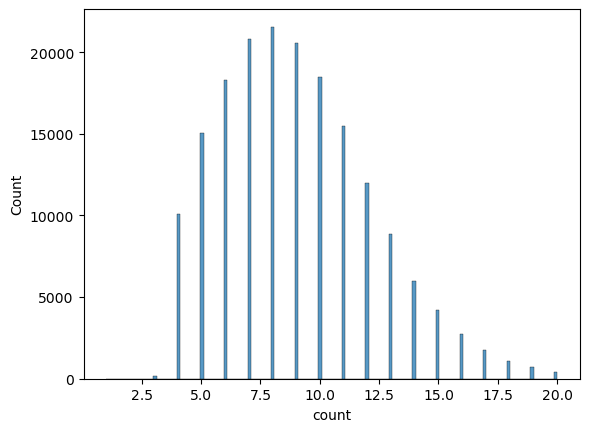

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = sns.histplot(receipt_data["count"],ax=ax)
plt.show()

In [15]:
receipt_data.shape

(178265, 5)

## filter data

In [16]:
receipt_data = receipt_data.query('count<6')

In [17]:
receipt_data.shape

(25299, 5)

In [18]:
receipt_data['ingredient_ids'][0:]

0                [648, 3355, 7501, 4253]
3                                 [6082]
5               [3869, 6906, 2427, 5068]
14               [811, 2794, 7929, 6273]
23               [512, 7655, 2794, 6654]
                       ...              
178201    [7998, 5476, 7642, 3723, 3497]
178228    [1093, 3203, 3577, 4096, 2837]
178237    [6906, 7063, 7655, 7449, 6108]
178256      [6387, 648, 255, 2591, 1954]
178263      [6909, 1076, 63, 1574, 5298]
Name: ingredient_ids, Length: 25299, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from scipy import sparse

CV = CountVectorizer()
converted_metrix = CV.fit_transform(receipt_data['ingredient_ids'].values.astype('U')).toarray()

In [20]:
converted_metrix.shape

(25299, 5136)

In [21]:
converted_metrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Using Tensors

In [22]:
# tensor = tf.constant(
# converted_metrix, shape=converted_metrix.shape, dtype=tf.int32)

In [23]:
# cosine_similarity[1][2]

In [24]:
# converted_metrix[:10000,:].shape

In [25]:
# similarities = tf.keras.losses.cosine_similarity(
#    converted_metrix[:65000,:], converted_metrix[:65000,:], axis=1
# )


In [26]:
# similarities

## Testing the Cosine similarity

In [27]:
A_sparse = sparse.csr_matrix(converted_metrix)
similarities = cosine_similarity(A_sparse)
# cos_sim_1_2 = cosine_similarity(converted_metrix[0, 10], converted_metrix[10, 20])
# cos_sim_1_3 = cosine_similarity(X[0, :], X[2, :])
# cos_sim_2_3 = cosine_similarity(X[1, :], X[2, :])

# print('\tDocument 1 and Document 3: ', cos_sim_1_3)
# print('\tDocument 2 and Document 3: ', cos_sim_2_3)


In [28]:

print('Cosine Similarity between: ', similarities.shape)
print('similarities: ', format(similarities))

Cosine Similarity between:  (25299, 25299)
similarities:  [[1.        0.        0.        ... 0.        0.2236068 0.       ]
 [0.        1.        0.        ... 0.        0.        0.       ]
 [0.        0.        1.        ... 0.2236068 0.        0.       ]
 ...
 [0.        0.        0.2236068 ... 1.        0.        0.       ]
 [0.2236068 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 0.        0.        1.       ]]


In [30]:
result = pd.DataFrame(similarities) #remove the .T here
result.to_csv('output/similarities.csv')
print('data saved')

data saved
